## Probability tables:

La idea aca es tener construida las probabilidades de tener un valor alejado un determinado porcentaje del promedio. Se utiliza una distribucion normal por que se quiere comparar el modelo en cuestion contra estas distribucion de probabilidad. Es decir queremos saber que tan "aleatorio" es el resultado obtenido o cuanto del resultado fue "suerte" y cuanto tiene algo de

In [312]:
# from scipy.stats import norm
import scipy.stats as st
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

def Zstatistic(z, m=0, s=1, v=0, tailed=1):
    if tailed==1: p = st.norm.cdf(z, m, s)
    elif tailed==2: p = st.norm.cdf(z, m, s) - st.norm.cdf(-z, m, s)
    if v: 
        print('Z:', z) #, )
        print(f'Confidence: {p:2.2%}')
        print(f'p-Value: {1-p:2.2%}')
        
    return p.round(4)


# def Tstatistic(pvalue, df, loc=0, scale=1):
#     # x = t.isf(pvalue, df, loc=loc, scale=scale).round(4)
#     p = t.sf(t, df, loc=loc, scale=scale)
#     return p
    
def Tstatistic(t, df, loc=0, scale=1, tailed=1):
    
    if tailed==1: p = st.t.cdf(t, df)
    elif tailed==2: 
        t = abs(t)
        p = st.t.cdf(t, df) - st.t.cdf(-t, df)
        
    return p.round(4)


In [12]:
fig, ax = plt.subplots(1, 1)
mean, sig = 10, 2
#mean, var, skew, kurt = norm.stats(mean, sig, moments='mvsk')

x = np.linspace(norm.ppf(0.01, mean, sig), norm.ppf(0.99, mean, sig), 100)
ax.plot(x, norm.pdf(x, mean, sig), 'r-', lw=5, alpha=0.6, label='Norm pdf')

mean, sig = 10, 1
ax.plot(x, norm.pdf(x, mean, sig), 'g-', lw=5, alpha=0.6, label='Norm pdf')


In [21]:
import pandas as pd 
sigs = np.array([1,2,3,4,5,6,7,8])
mean = 0
ps = [norm.pdf(9, mean, s) for s in sigs]
pd.DataFrame({'Sigs': sigs, 'probs': ps})

Sigs         probs
0     1  1.027977e-18
1     2  7.991871e-06
2     3  1.477283e-03
3     4  7.934913e-03
4     5  1.579003e-02
5     6  2.158627e-02
6     7  2.493758e-02
7     8  2.648458e-02

In [25]:
# The average birth weight for an American boy is 7.5 lbs., 
# with a standard deviation of 1.25 lbs.
mu0 = 7.5
sig0 = 1.25
df = pd.read_csv('./data/Ejemplo1_hypothesisTesting.csv')
df['Weight (lbs)'].describe()

count    30.000000
mean      7.833333
std       1.492818
min       5.500000
25%       6.850000
50%       7.700000
75%       8.450000
max      12.000000
Name: Weight (lbs), dtype: float64

In [140]:
# Z statistic: z = (xmean - x0)/(sig0/sqrt(n))
n = len(df)
xmean = df['Weight (lbs)'].mean()
xstd = df['Weight (lbs)'].std()
sigmean = sig0/np.sqrt(n) # ATENCION! ACA VA sig0! que es el sigma conocido! sigmean del promedio conocido!
z = ((xmean - mu0)/sigmean).round(3)
print(mu0, sig0, f"n={n}")
# print(xmean, xstd, sigmean)

print('Z:', z) #, )
print(f'Confidence: {Zstatistic(z):2.2%}')
print(f'p-Value: {1-Zstatistic(z):2.2%}')



7.5 1.25 n=30
Z: 1.461
Confidence: 92.80%
p-Value: 7.20%


### (T Statistic) Midiendo la desviacion standard de numeros del 1 al 10: 


In [164]:
s5 = []
s10 = []
for i in range(1000):
    s5.append(np.random.randint(1, 11, size=5).std())
    s10.append(np.random.randint(1, 11, size=10).std())

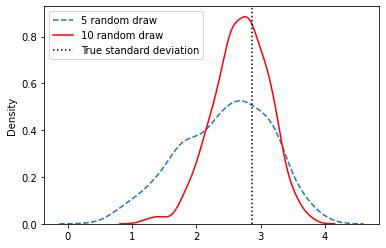

In [172]:
import seaborn as sns

ax = sns.kdeplot(data=s5, linestyle='--', label='5 random draw')
ax = sns.kdeplot(data=s10, color='r', label='10 random draw')
_ = ax.axvline(2.87, color='k', linestyle=':', label='True standard deviation')
_ = ax.legend()


### T-Test: Tenemos el promedio de la poblacion pero no la desviacion standard, y una muestra. 

In [175]:
m0 = 5.5
df = pd.read_csv('./data/Ejemplo2_hypothesisTesting.csv')
df['Height (feet)'].describe()



count    15.000000
mean      5.673333
std       0.310453
min       5.100000
25%       5.500000
50%       5.700000
75%       5.850000
max       6.200000
Name: Height (feet), dtype: float64

In [278]:
n = len(df) 
ndf = n - 1
xmean = df['Height (feet)'].mean()
s = df['Height (feet)'].std()
t = (xmean - m0)/(s/np.sqrt(n))
print(n, ndf)
print(xmean, s)
print(t)



15 14
5.673333333333333 0.3104528182847635
2.162380477173991


In [282]:
confidence = Tstatistic(t, ndf, tailed=2)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')



T: 2.162380477173991, df: 14
Confidence: 95.16%
p-Value: 4.84%


Como el p value es <0.05 (usamos el criterio del 95% de 'confidence') decimos que la diferencia es estadisticamente significativa. Estamos seguros con una probabilidad mayor al 95% de que el promedio calculado es distinto del informado para la poblacion (2 tailed). Si calculamos la probabilidad de que el nuevo valor sea mayor y estadisticamente significativo (crito del 95% de 'confidence') (1 tailed) obtenemos un p value 2.42% (<5%)

In [283]:
confidence = Tstatistic(t, ndf, tailed=1)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')

T: 2.162380477173991, df: 14
Confidence: 97.58%
p-Value: 2.42%


### Ejemplo 3: Paired t test: Tenemos 2 estados sobre la misma muestra

In [313]:
df = pd.read_csv('./data/Ejemplo3_hypothesisTesting.csv')
df['change_in_weight'] = df['after_weight_lbs'] - df['before_weight_lbs']
df.describe()


Participan_id  before_weight_lbs  after_weight_lbs  change_in_weight
count       20.00000          20.000000         20.000000         20.000000
mean        10.50000         137.950000        132.600000         -5.350000
std          5.91608          22.658738         21.678027          5.612721
min          1.00000         108.000000        102.000000        -15.000000
25%          5.75000         118.750000        115.750000         -9.000000
50%         10.50000         133.500000        129.000000         -6.500000
75%         15.25000         151.250000        141.000000         -2.750000
max         20.00000         182.000000        175.000000          7.000000

In [314]:
n = len(df) 
ndf = n - 1
x1mean = df['before_weight_lbs'].mean().round(4)
x2mean = df['after_weight_lbs'].mean().round(4)
#d = (x2mean - x1mean).round(4)

d = df['change_in_weight'].mean().round(4)
s = df['change_in_weight'].std().round(4)
t = d/(s/np.sqrt(n))
print(d, s)
print(n, ndf)
print(xmean)
print(t)


-5.35 5.6127
20 19
5.673333333333333
-4.262819562643246


In [315]:
confidence = Tstatistic(t, ndf, tailed=2)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')


T: -4.262819562643246, df: 19
Confidence: 99.96%
p-Value: 0.04%


In [317]:
confidence = Tstatistic(abs(t), ndf, tailed=1)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')


T: -4.262819562643246, df: 19
Confidence: 99.98%
p-Value: 0.02%


yes, we can say with greater than 99% confidence that the participants lost weight.

- Cummulative p-value: 0.02%
- 2 tailed p-value: 0.04%

---
Que pasa si queremos saber ademas de la significancia estadistica, cuan grande es el cambio o dicho de otro modo la magnitud del valor medio. Siguiendo el caso anterior queremos una perdida de peso minima. Esto se denomina **non-zero hypothesis**

In [344]:
# Queremos que la diferencia sea mayor a un valor promedio dado mu0: 
mu0 = -4 # the hypothesized mean difference (una perdida por eso el '-')

n = len(df) 
ndf = n - 1
x1mean = df['before_weight_lbs'].mean().round(4)
x2mean = df['after_weight_lbs'].mean().round(4)
#d = (x2mean - x1mean).round(4)

d = df['change_in_weight'].mean().round(4)
s = df['change_in_weight'].std().round(4)
t = (d-mu0)/(s/np.sqrt(n))
print(d, s)
print(n, ndf)
print(xmean)
print(t)


-5.35 5.6127
20 19
5.673333333333333
-1.0756647494520337


In [345]:
# Since we want to determine if the participants lost weight on the diet, and not
# just if their weight changed, we want a 1 tailed p-value
confidence = Tstatistic(abs(t), ndf, tailed=1)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')


T: -1.0756647494520337, df: 19
Confidence: 85.22%
p-Value: 14.78%


In [346]:
confidence = Tstatistic(abs(t), ndf, tailed=2)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')


T: -1.0756647494520337, df: 19
Confidence: 70.45%
p-Value: 29.55%


no, we cannot say with 95% confidence that the participants lost more than 4 pounds.
- Cumulative p-value: 14.78%
- 2 tailed p-value: 29.55%

In [357]:
# Podemos buscar cual es el peso minimo de perdida que podemos asegurar con un 95% de confianza.!
for mustar in [-4, -3.5, -3.2, -3.18, -3, -2]:
    tn = (d-mustar)/(s/np.sqrt(n))
    confidence = Tstatistic(abs(tn), ndf, tailed=1)
    print(f'mu0: {mustar:2.2f}, T: {tn:2.4f}, Confidence: {confidence:2.2%}')
    # print(f'p-Value: {1-confidence:2.2%}')
    


mu0: -4.00, T: -1.0757, Confidence: 85.22%
mu0: -3.50, T: -1.4741, Confidence: 92.16%
mu0: -3.20, T: -1.7131, Confidence: 94.85%
mu0: -3.18, T: -1.7290, Confidence: 95.00%
mu0: -3.00, T: -1.8725, Confidence: 96.17%
mu0: -2.00, T: -2.6692, Confidence: 99.24%


In [359]:
# Si asumimos que los promedio no van a cambiar podemos calcular 
# cuantas muestras más debemos medir para obtener la confidence requerida.

nstar = (-1.7290/(d-mu0)*s)**2
print(nstar)

# O probando:
for nstar in [n+i for i in [2, 5, 10, 20, 25, 30, 40]]:
    tn = (d-mu0)/(s/np.sqrt(nstar))
    confidence = Tstatistic(abs(tn), ndf, tailed=1)
    print(f'n: {nstar:2.2f}, T: {tn:2.2f}, Confidence: {confidence:2.2%}')

51.673289445694905
n: 22.00, T: -1.13, Confidence: 86.34%
n: 25.00, T: -1.20, Confidence: 87.81%
n: 30.00, T: -1.32, Confidence: 89.83%
n: 40.00, T: -1.52, Confidence: 92.77%
n: 45.00, T: -1.61, Confidence: 93.84%
n: 50.00, T: -1.70, Confidence: 94.74%
n: 60.00, T: -1.86, Confidence: 96.10%


---
## Two-sample T-test:
The final two examples are the type of statistical significance calculations you
probably most commonly think of for any medicinal scientific study. In these
examples, you essentially have two groups, one of which is the control and the
other is the study group.


Example 4: You have two different types of cat food, and want to determine if the cats eat a
different amount of type B food than type A, with at least 95% confidence.
You are not using the same cats for each test

In [361]:
df = pd.read_csv('./data/Ejemplo4_hypothesisTesting.csv')
# df['change_in_weight'] = df['after_weight_lbs'] - df['before_weight_lbs']
df.describe()

Type A, Amount Eaten (ounces)  Type B, Amount Eaten (ounces)
count                      10.000000                      12.000000
mean                        1.730000                       2.191667
std                         0.623699                       0.611196
min                         0.900000                       1.300000
25%                         1.325000                       1.775000
50%                         1.500000                       2.000000
75%                         2.250000                       2.775000
max                         2.700000                       3.100000

In [367]:
x1mean = 1.73
n1 = 10
s1 = 0.6237

x2mean = 2.1917
n2 = 12
s2 = 0.6112

d = x2mean - x1mean
ndf = (n1+n2-2)
avg_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/ndf) * np.sqrt(1/n1+1/n2)
avg_std = avg_std.round(4)
t = d / avg_std
t = t.round(4)

print(d, avg_std)
print(ndf)
print(t)

0.4617 0.2641
20
1.7482


In [370]:
print('1 TAILED:')
confidence = Tstatistic(abs(t), ndf, tailed=1)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')
print()
print("2 TAILED:")
confidence = Tstatistic(abs(t), ndf, tailed=2)
print(f'T: {t}, df: {ndf}') #, )
print(f'Confidence: {confidence:2.2%}')
print(f'p-Value: {1-confidence:2.2%}')


1 TAILED:
T: 1.7482, df: 20
Confidence: 95.21%
p-Value: 4.79%

2 TAILED:
T: 1.7482, df: 20
Confidence: 90.42%
p-Value: 9.58%


we cannot conclude with at least 95% confidence that cats will eat a different amount of
food. (Note, the 1 tailed p-value is .0479, so we could have concluded with
95% confidence that the cats eat more food), which is an odd, but correct,
result and shows the importance of deciding if you intend to get a 1 tailed or 2
tailed result.

In [377]:
# stats.ttest_ind
st.ttest_ind(df.iloc[:,0], df.iloc[:,1], equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-1.7479367565919788, pvalue=0.09581111254844021)

---
### Remains the case where we cannot assume equal variance in both samples:

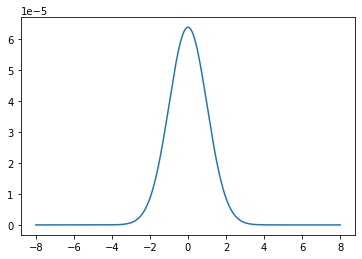

In [110]:
# Compare with the Z-Table:
import pandas as pd 
m, s = 0, 1
npoints = 100000
l=8
x = np.linspace(-l, l, npoints)
prob = norm.pdf(x, m, s)/(npoints/(2*l))
_ = plt.plot(x, prob)


In [254]:
from scipy.stats import t

print('Cummulative:', t.cdf(0.005, 1, loc=0, scale=1))
print('Probability:', t.pdf(0.005, 1, loc=0, scale=1))
def Tstatistic(pvalue, df, loc=0, scale=1):
    round t.isf(pvalue, df, loc=loc, scale=scale).round(4)
    
    

Cummulative: 0.501591536168206
Probability: 0.3183019286355749


2.9467

In [234]:
1 - norm.ppf(0.75, loc=0, scale=1/np.sqrt(5))

0.6983590136869419

In [241]:
x = 0.1 
norm.cdf(x, loc=0, scale=1) - norm.cdf(-x, loc=0, scale=1)

0.07965567455405798

In [51]:
# 2 tailed
pth=10
p0 = int(npoints/2)
prob[p0-pth:p0+pth].sum()



7.925996278160682

In [ ]:
norm.